# MNIST (Multiclass-Classification) using Tensorflow(Keras)

## MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Data Splitting

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## Preprocessing

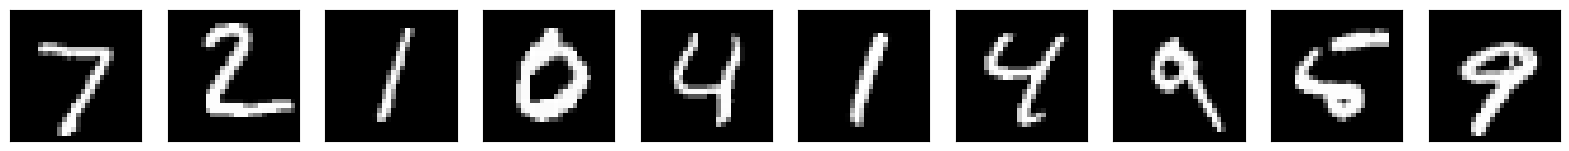

In [ ]:
import matplotlib.pyplot as plt

n = 10 #how many digits we will display
plt.figure(figsize=(20,4))

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

## Flattening the Images

In [ ]:
print("Previous X_train shape: {} \nPrevious Y_train shape: {}".format(X_train.shape, Y_train.shape))

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape: (60000,)


## Min-Max Scalling

In [ ]:
# convert data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values  to a range between 0 and 1
X_train /= 255 # 0 mean black and 255 white
X_test /= 255

## Processing the target variable (One hot encoding(will display desired as 1 and other 0))

In [ ]:
# no of classes in the datset
classes = 10

# convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test =to_categorical(Y_test, classes)

# print the preprocesses and reshaped data
print("Now X_train shape: {} \nNew Y_train shape: {}".format(X_train.shape, Y_train.shape))

Now X_train shape: (60000, 784) 
New Y_train shape: (60000, 10)


## Setting up parameters

In [ ]:
# no size for each data sample(image pixels(28*28))
batch_size = 200

# no of data sample to process in each batch(no of neurons in input layer)
input_size = 784

# no of neurons in 1st hidden layer
hidden1 = 400

# no of neurons in 2nd layer
hidden2 = 20

# total no of calsses and categories (outout layer)
classes = 10

# no pf complete pass through the dataset
epochs = 10

## Building the FCN Model

In [ ]:
# standars neural network or fully connected neural network(layer by layer)
model = Sequential()

# 1st hidden layers with 'hidden1' neurons using relu activation function
# Dense a connected layers box(every neuron linked with all previous neurons(will put neurons in it))
model.add(Dense(400, input_dim=input_size, activation='relu')) # relu --> 1 neuron or activation function

# 2nd hiiden layers with 'hidden2' neurons also using activation function
model.add(Dense(20, activation='relu'))

# using softmax bcz its multiclass classification (output layer --> ouptut prob of each class)
# softmax --> collection of neurons(10 neurons base on the categories)
model.add(Dense(classes, activation='softmax'))

# compile the model by specifying the loss function, optimizer and avaluation metrics
# for binary binary_crossentropy and for multiclass categorical_crossentropy
# sgd --> stochastic gradient descent(optimizer)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 400)               314000    
                                                                 
 dense_25 (Dense)            (None, 20)                8020      
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Parameter calculation
output = relu(dot(W,input) + bias)
(400*784) + 400 = 31400 = 0.3 million parameters

parameters for chat-gpt4 = 1.76trillion

## Training the model

In [ ]:
from time import time

# record the time
tic = time()

# fit the model
model.fit(X_train, Y_train, batch_size=batch_size, epochs = 10, verbose=1)

# time after training
toc = time()

# calculate and print time taken from model training
print("Model training took {} secs.".format(toc - tic))

Epoch 1/10
300/300 [==============================] - 3s 8ms/step - loss: 1.4540 - accuracy: 0.5987
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.6421 - accuracy: 0.8500
Epoch 3/10
300/300 [==============================] - 3s 12ms/step - loss: 0.4589 - accuracy: 0.8817
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3889 - accuracy: 0.8961
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3503 - accuracy: 0.9043
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3243 - accuracy: 0.9103
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3050 - accuracy: 0.9148
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2892 - accuracy: 0.9186
Epoch 9/10
300/300 [==============================] - 3s 9ms/step - loss: 0.2762 - accuracy: 0.9222
Epoch 10/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2649 - accuracy: 0.92

## Testing the model

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# predict
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# calculate and print the test accuracy
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.9089


1/1 [==============================] - 0s 21ms/step


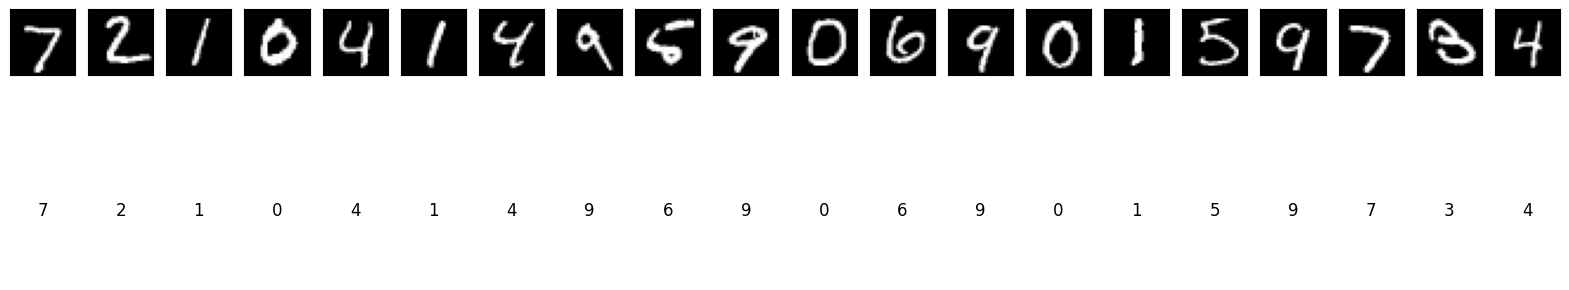

In [ ]:
# define a mask for selecting a dice of ranges(20 to 49)
mask = range(20, 50)

# select the first 20 samples from the test set for viz
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# predict probs for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

# set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display predicted digits
  predicted_digit = np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2, n, i+1+n)
  plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
  plt.axis('off')

plt.show()
plt.close()